In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
db_file_path = "../../dataset/adult.data"
income_df = pd.read_csv(db_file_path, header=None)

income_df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]

In [3]:
income_df = income_df.map(lambda x: x.strip() if isinstance(x, str) else x)
income_df.replace("?", None, inplace=True)
income_df['income'] = income_df['income'].apply(lambda x: False if x == "<=50K" else True)

print("Total rows:", len(income_df))

Total rows: 32561


In [4]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


In [5]:
income_gt_50k = income_df[income_df["income"] == True]
income_le_50k = income_df[income_df["income"] == False]

print("Income >50k: ", len(income_gt_50k))
print("Income <=50k: ", len(income_le_50k))

Income >50k:  7841
Income <=50k:  24720


### 1. Age Distribution by Income Level


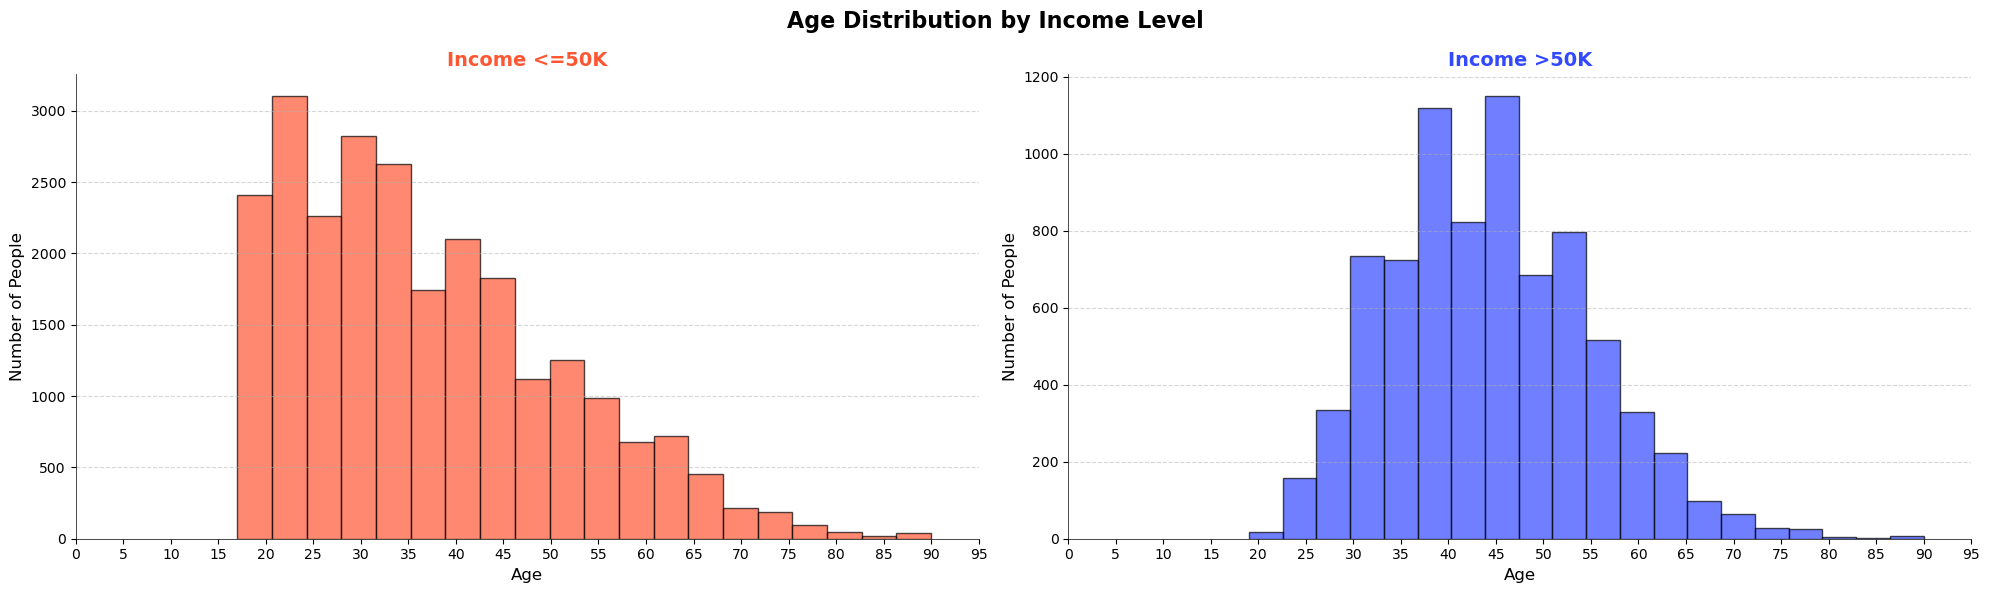

In [6]:
colors = ["#FF5733", "#3349FF"]
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

for i, (income_age_df, title) in enumerate(zip([income_le_50k, income_gt_50k], ["Income <=50K", "Income >50K"])):
    ax = axs[i]
    ax.hist(income_age_df["age"], bins=20, color=colors[i], alpha=0.7, edgecolor="black")
    ax.set_title(title, fontsize=14, fontweight="bold", color=colors[i])
    ax.set_xlabel("Age", fontsize=12)
    ax.set_ylabel("Number of People", fontsize=12)
    ax.set_xticks(np.arange(0, 100, 5))
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.tick_params(axis="both", which="major", labelsize=10)

plt.suptitle("Age Distribution by Income Level", fontsize=16, fontweight="bold", color="black")
plt.tight_layout()
plt.show()

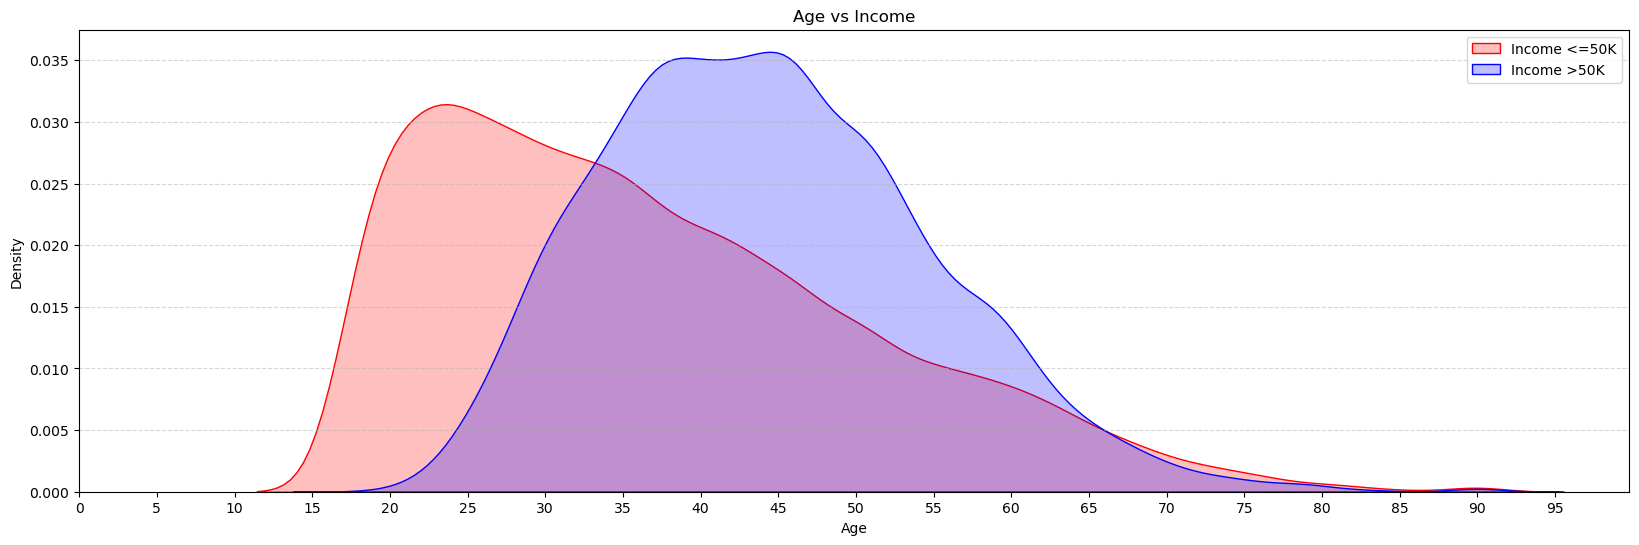

In [7]:
plt.figure(figsize=(20, 6))
sns.kdeplot(income_le_50k["age"], color="r", label="Income <=50K", fill=True)
sns.kdeplot(income_gt_50k["age"], color="b", label="Income >50K", fill=True)
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(np.arange(0, 100, 5))
plt.legend()
plt.show()

### 2. Race vs Income Levels


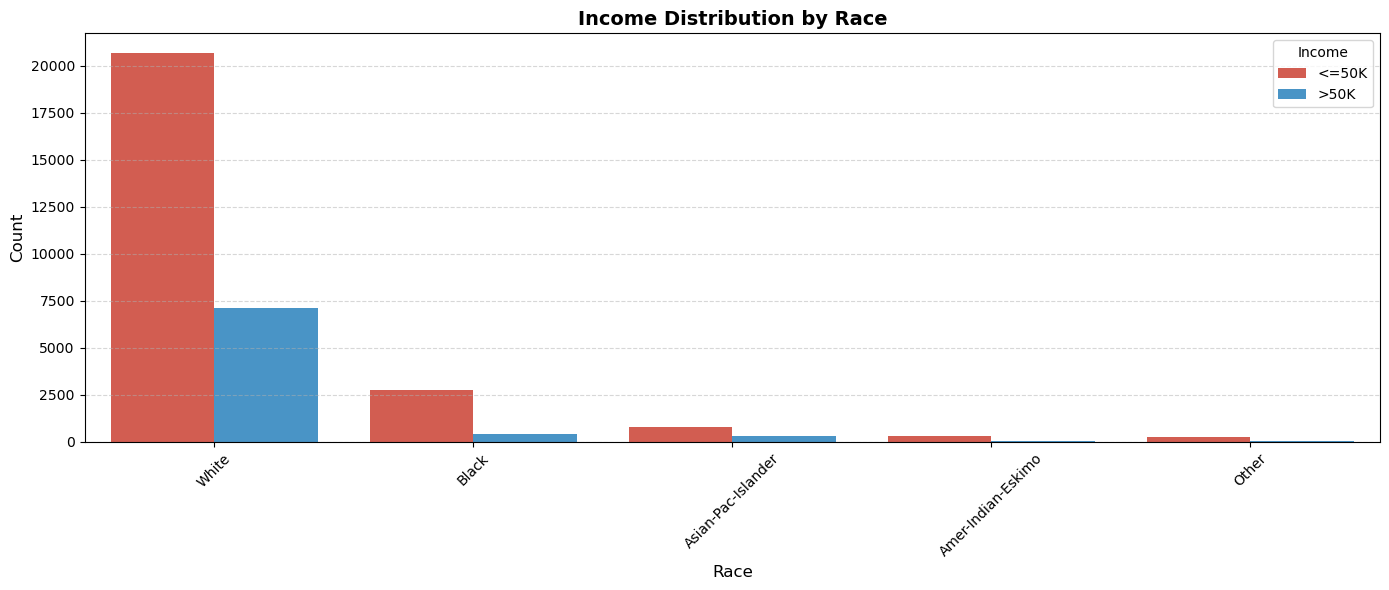

In [8]:
colors = ["#e74c3c", "#3498db"]

plt.figure(figsize=(14, 6))
sns.countplot(x="race", hue="income", data=income_df, palette=colors)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Income Distribution by Race", fontsize=14, fontweight="bold")
plt.legend(title="Income", labels=["<=50K", ">50K"], fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Education Level and Capital Gain vs Income


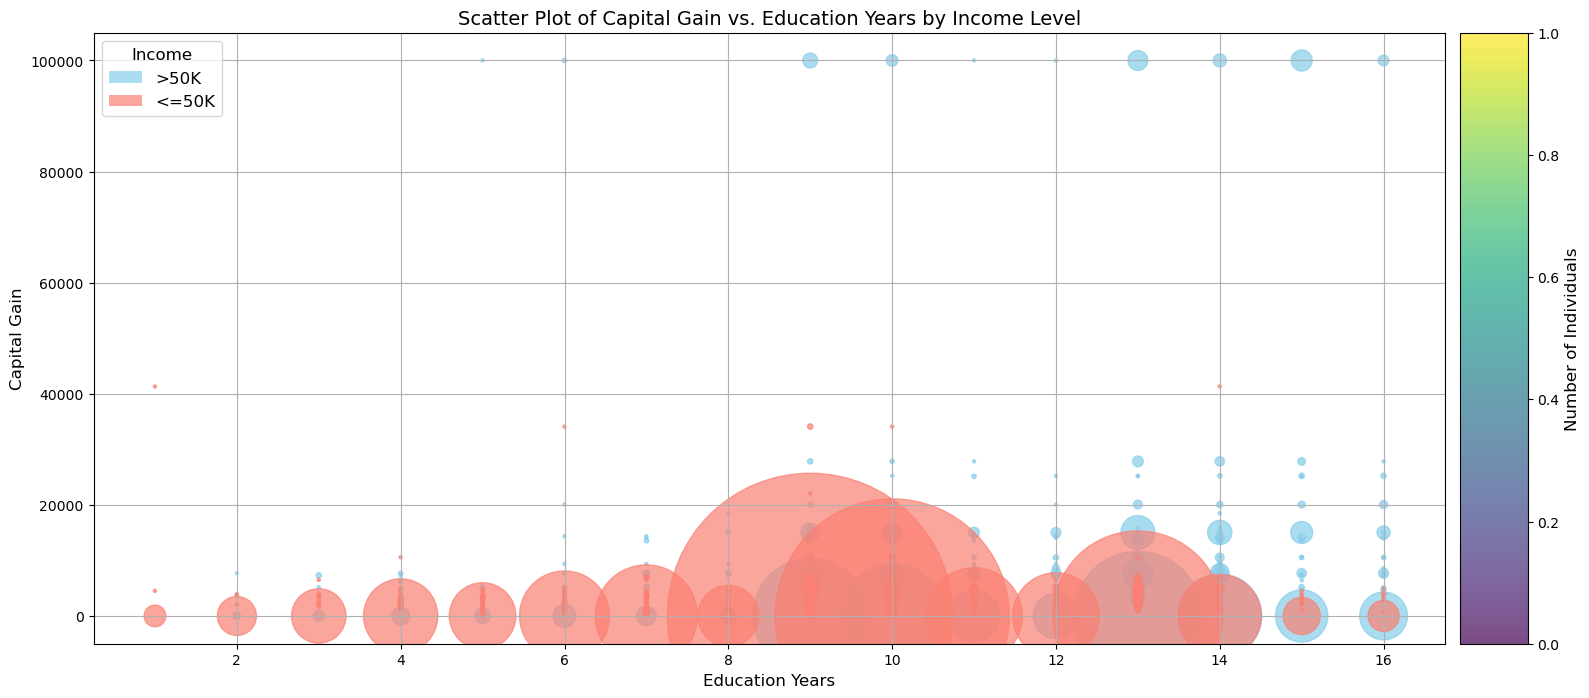

In [9]:
high_income_counts = income_gt_50k.groupby(["education-num", "capital-gain"]).size()
low_income_counts = income_le_50k.groupby(["education-num", "capital-gain"]).size()


fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[8, 1], width_ratios=[20, 1])


ax1 = fig.add_subplot(gs[0, 0])
sc1 = ax1.scatter(
    high_income_counts.index.get_level_values(0),
    high_income_counts.index.get_level_values(1),
    s=high_income_counts.values * 5,
    c="skyblue",
    alpha=0.7,
    label=">50K",
    marker="o",
)


sc2 = ax1.scatter(
    low_income_counts.index.get_level_values(0),
    low_income_counts.index.get_level_values(1),
    s=low_income_counts.values * 5,
    c="salmon",
    alpha=0.7,
    label="<=50K",
    marker="o",
)

ax1.set_xlabel("Education Years", fontsize=12)
ax1.set_ylabel("Capital Gain", fontsize=12)
ax1.set_title("Scatter Plot of Capital Gain vs. Education Years by Income Level", fontsize=14)
ax1.grid(True)


cb_ax = fig.add_subplot(gs[0, 1])
cb = fig.colorbar(sc1, cax=cb_ax, orientation="vertical")
cb.set_label("Number of Individuals", fontsize=12)


legend_elements = [
    mpatches.Circle((0, 0), 1, color="skyblue", label=">50K", alpha=0.7, linewidth=0),
    mpatches.Circle((0, 0), 1, color="salmon", label="<=50K", alpha=0.7, linewidth=0),
]
ax1.legend(handles=legend_elements, title="Income", fontsize="large", title_fontsize="large", loc="upper left")

plt.tight_layout()
plt.show()

### 4. Hours worked per week, Marital Status, and Years of Education vs Income


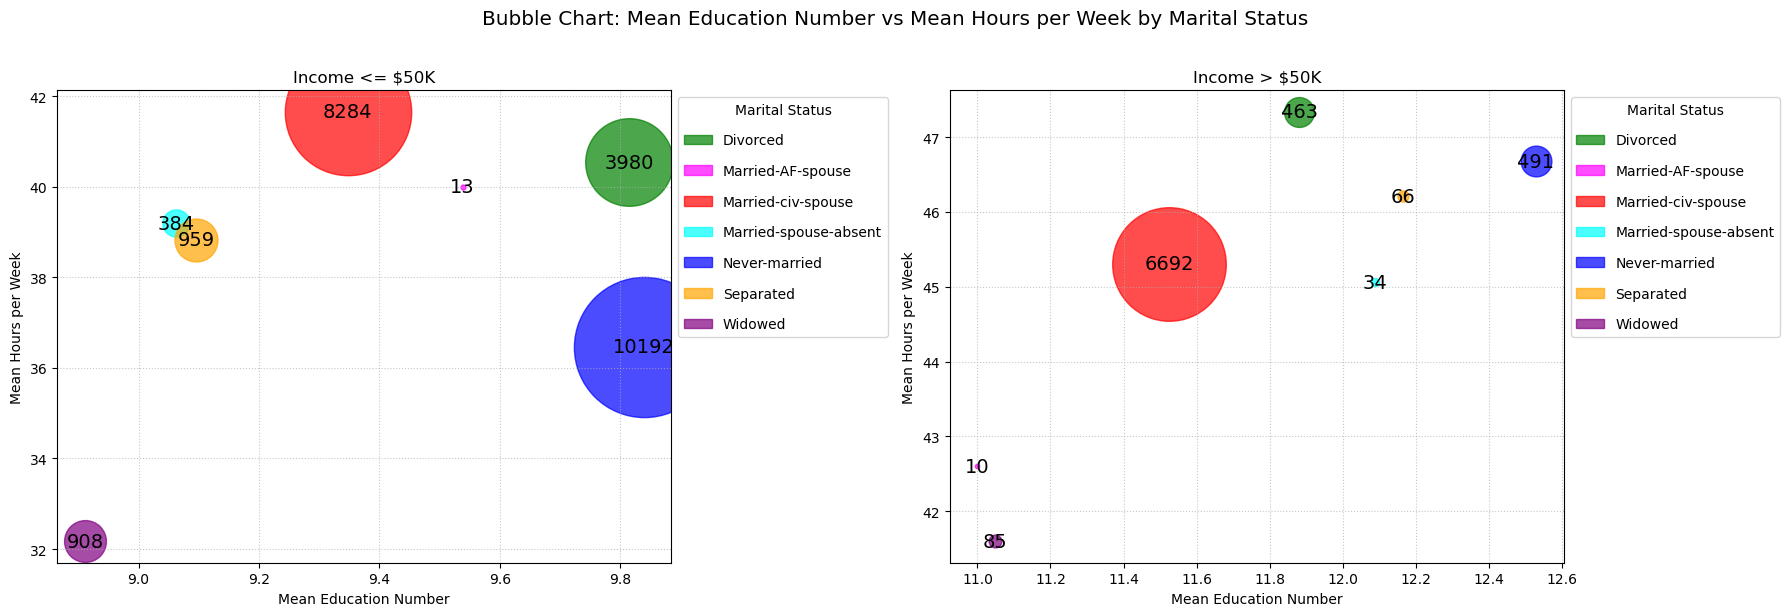

In [10]:
income_gt_50k_agg_by_marital_status = (
    income_gt_50k.groupby(["marital-status"])
    .agg({"education-num": "mean", "hours-per-week": "mean", "marital-status": "count"})
    .rename(columns={"marital-status": "count"})
)

income_le_50k_agg_by_marital_status = (
    income_le_50k.groupby(["marital-status"])
    .agg({"education-num": "mean", "hours-per-week": "mean", "marital-status": "count"})
    .rename(columns={"marital-status": "count"})
)


marital_status_colors = {
    "Married-civ-spouse": "red",
    "Never-married": "blue",
    "Divorced": "green",
    "Separated": "orange",
    "Widowed": "purple",
    "Married-spouse-absent": "cyan",
    "Married-AF-spouse": "magenta",
}

fig, axs = plt.subplots(1, 2, figsize=(18, 6))


axs[0].set_title("Income <= $50K")
handles = []
for i, row in income_le_50k_agg_by_marital_status.reset_index().iterrows():
    handle = mpatches.Circle((0, 0), label=row["marital-status"], color=marital_status_colors[row["marital-status"]], alpha=0.7)
    handles.append(handle)
    scatter = axs[0].scatter(row["education-num"], row["hours-per-week"], s=row["count"], c=marital_status_colors[row["marital-status"]], alpha=0.7)
    axs[0].text(row["education-num"], row["hours-per-week"], row["count"], ha="center", va="center", color="black", fontsize=14)

axs[0].set_xlabel("Mean Education Number")
axs[0].set_ylabel("Mean Hours per Week")
axs[0].legend(handles=handles, title="Marital Status", bbox_to_anchor=(1, 1), loc="upper left", labelspacing=1.2, fontsize="medium")
axs[0].grid(True, alpha=0.7, linestyle=":")


axs[1].set_title("Income > $50K")
handles = []
for i, row in income_gt_50k_agg_by_marital_status.reset_index().iterrows():
    handle = mpatches.Circle((0, 0), label=row["marital-status"], color=marital_status_colors[row["marital-status"]], alpha=0.7)
    handles.append(handle)
    scatter = axs[1].scatter(row["education-num"], row["hours-per-week"], s=row["count"], c=marital_status_colors[row["marital-status"]], alpha=0.7)
    axs[1].text(row["education-num"], row["hours-per-week"], row["count"], ha="center", va="center", color="black", fontsize=14)
axs[1].set_xlabel("Mean Education Number")
axs[1].set_ylabel("Mean Hours per Week")
axs[1].legend(handles=handles, title="Marital Status", bbox_to_anchor=(1, 1), loc="upper left", labelspacing=1.2, fontsize="medium")
axs[1].grid(True, alpha=0.7, linestyle=":")


plt.suptitle("Bubble Chart: Mean Education Number vs Mean Hours per Week by Marital Status", y=1.02, fontsize="x-large")

plt.tight_layout()
plt.show()

### 5. Hours worked per week, Age and Workclass vs Income


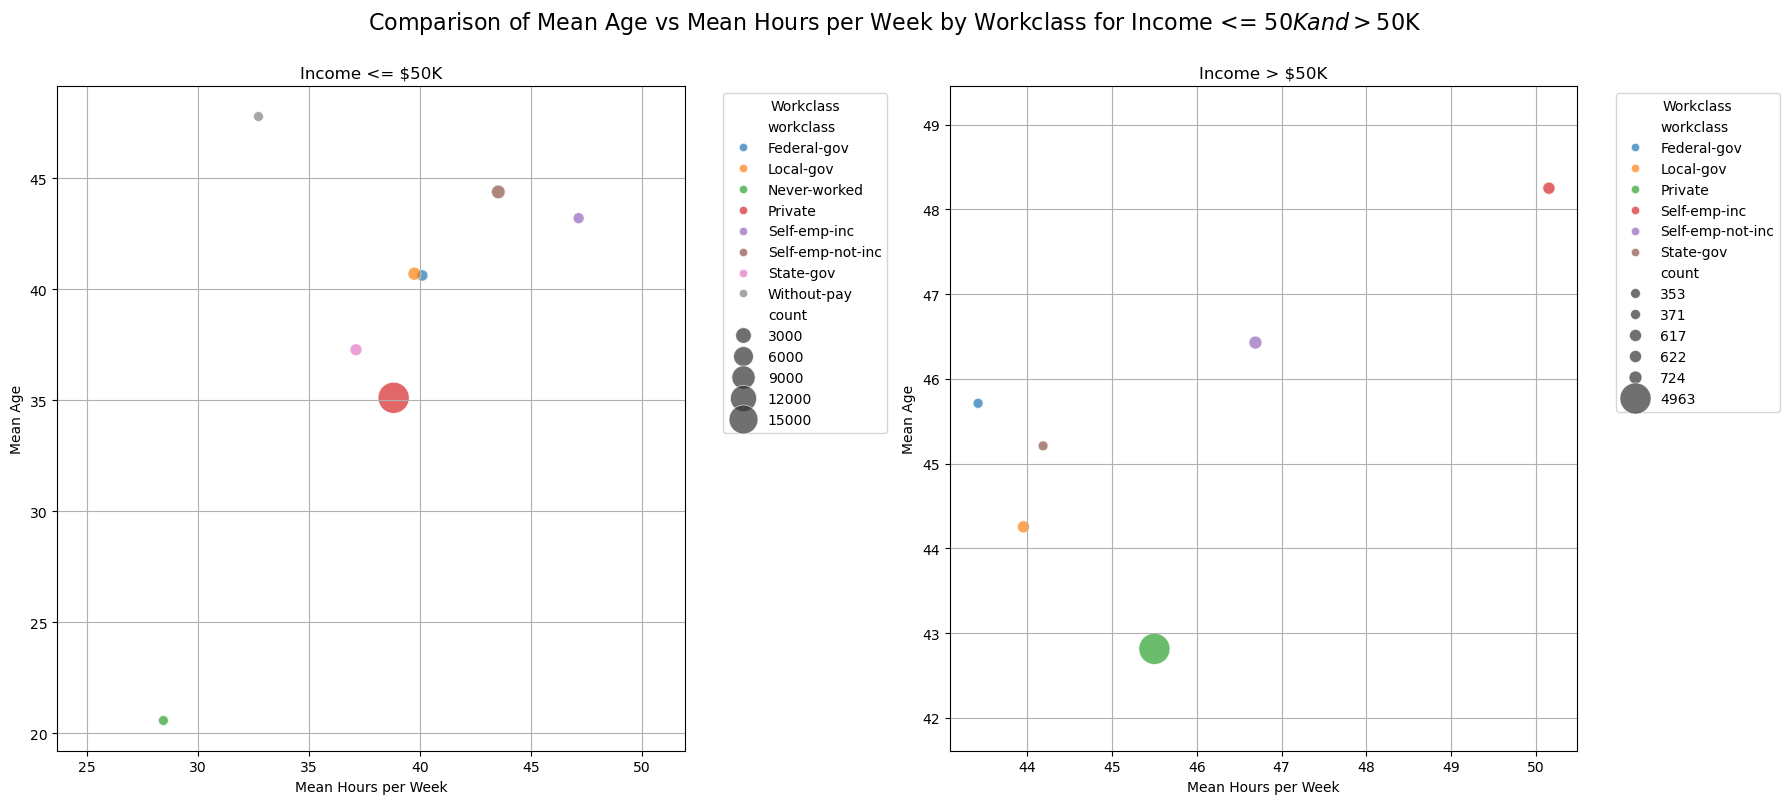

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

workclass_colors = {
    "Private": "red",
    "Self-emp-not-inc": "blue",
    "Local-gov": "green",
    "State-gov": "orange",
    "Self-emp-inc": "purple",
    "Federal-gov": "cyan",
    "Without-pay": "magenta",
    "Never-worked": "yellow",
}

income_le_50k_agg_by_workclass = (
    income_le_50k.groupby(["workclass"]).agg({"income": "count", "hours-per-week": "mean", "age": "mean"}).rename(columns={"income": "count"})
)

income_gt_50k_agg_by_workclass = (
    income_gt_50k.groupby(["workclass"]).agg({"income": "count", "hours-per-week": "mean", "age": "mean"}).rename(columns={"income": "count"})
)


fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(
    ax=axs[0],
    data=income_le_50k_agg_by_workclass,
    x="hours-per-week",
    y="age",
    size="count",
    sizes=(50, 500),
    hue=income_le_50k_agg_by_workclass.index,
    alpha=0.7,
    palette="tab10",
)
axs[0].set_xlabel("Mean Hours per Week")
axs[0].set_ylabel("Mean Age")
axs[0].set_title("Income <= $50K")
axs[0].legend(title="Workclass", bbox_to_anchor=(1.05, 1), loc="upper left")
axs[0].grid(True)
axs[0].axis("equal")

sns.scatterplot(
    ax=axs[1],
    data=income_gt_50k_agg_by_workclass,
    x="hours-per-week",
    y="age",
    size="count",
    sizes=(50, 500),
    hue=income_gt_50k_agg_by_workclass.index,
    alpha=0.7,
    palette="tab10",
)
axs[1].set_xlabel("Mean Hours per Week")
axs[1].set_ylabel("Mean Age")
axs[1].set_title("Income > $50K")
axs[1].legend(title="Workclass", bbox_to_anchor=(1.05, 1), loc="upper left")
axs[1].grid(True)
axs[1].axis("equal")

plt.suptitle("Comparison of Mean Age vs Mean Hours per Week by Workclass for Income <= $50K and > $50K", y=1, fontsize=16)
plt.tight_layout()
plt.show()

### 6. Occupation vs Sex

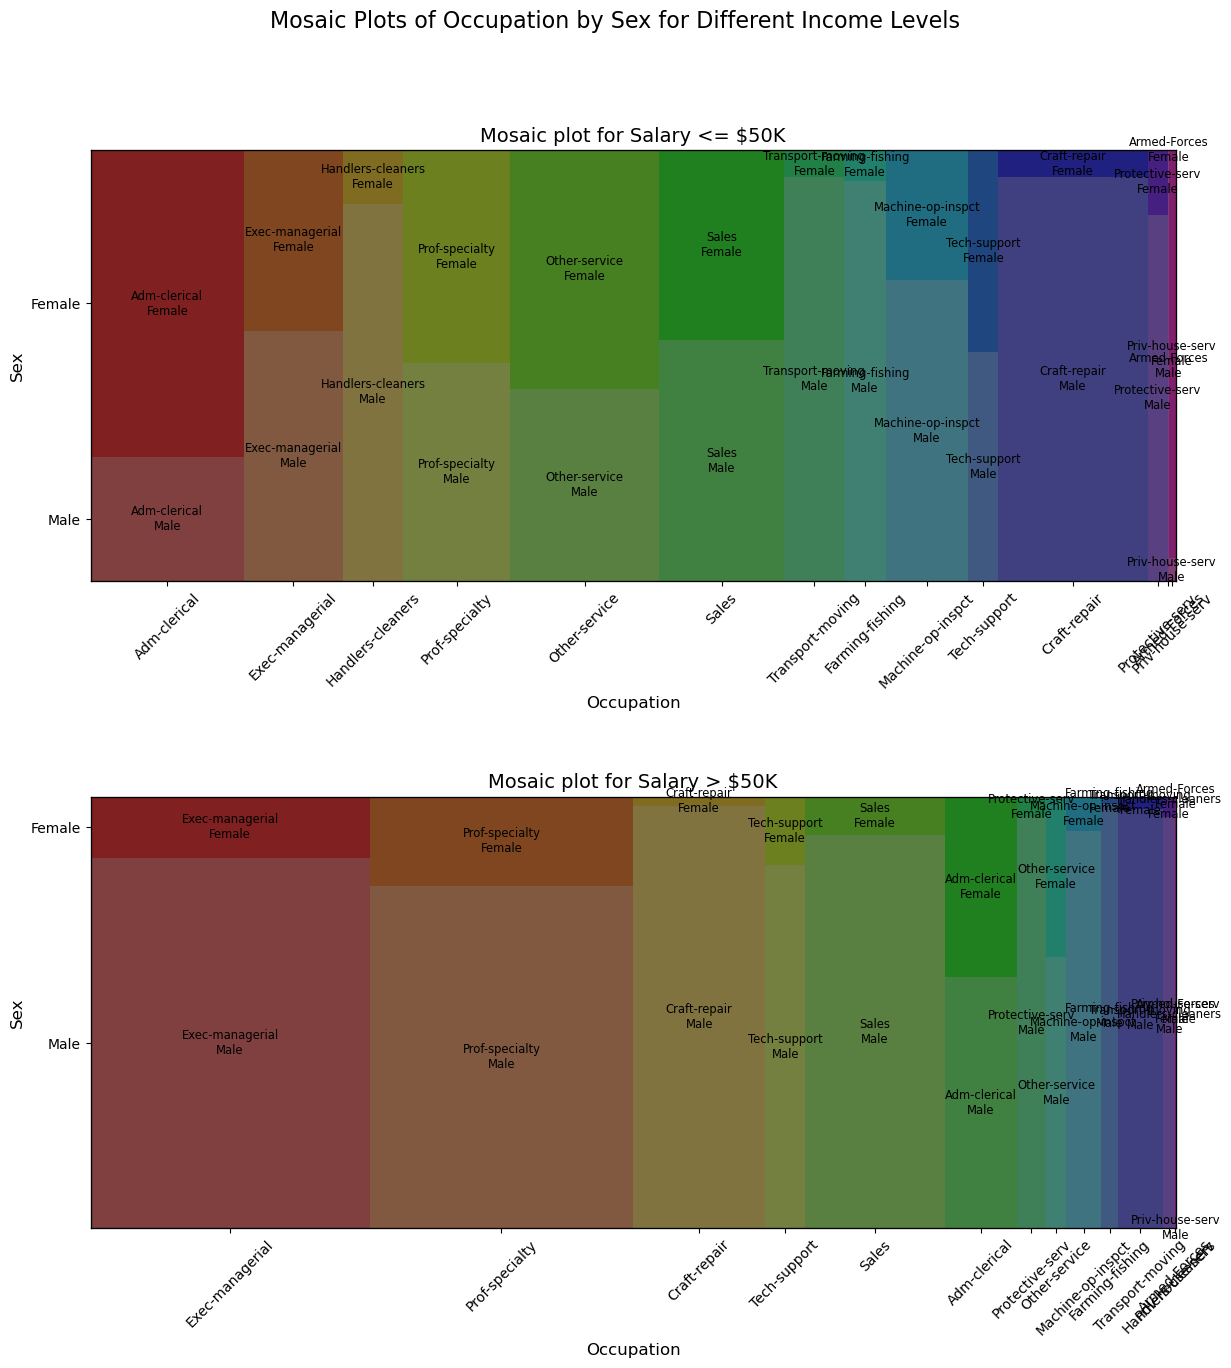

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Plot for income <= 50K
mosaic(income_le_50k, ["occupation", "sex"], ax=axs[0], gap=0)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, fontsize=10)
axs[0].set_xlabel("Occupation", fontsize=12)
axs[0].set_ylabel("Sex", fontsize=12)
axs[0].set_title("Mosaic plot for Salary <= $50K", fontsize=14)

# Plot for income > 50K
mosaic(income_gt_50k, ["occupation", "sex"], ax=axs[1], gap=0)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, fontsize=10)
axs[1].set_xlabel("Occupation", fontsize=12)
axs[1].set_ylabel("Sex", fontsize=12)
axs[1].set_title("Mosaic plot for Salary > $50K", fontsize=14)

plt.subplots_adjust(hspace=0.5)
plt.suptitle("Mosaic Plots of Occupation by Sex for Different Income Levels", fontsize=16)
plt.show()


### 7. Capital Gain , Education and Hours per week vs Income

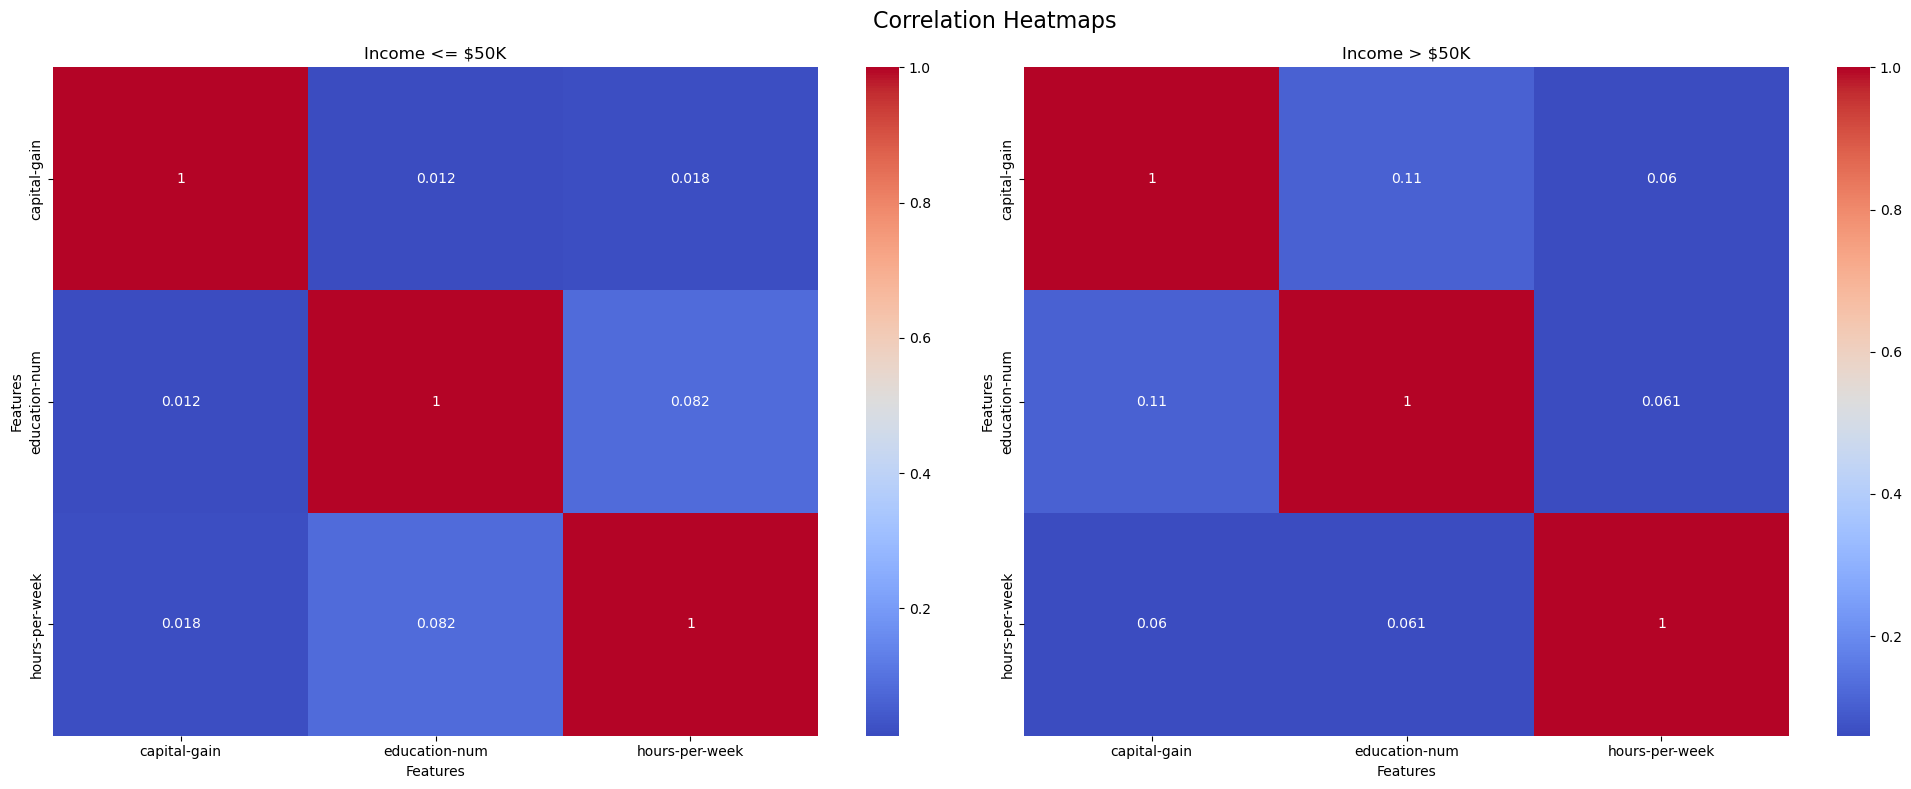

In [13]:
data_le_50k = income_le_50k[['capital-gain', 'education-num', 'hours-per-week']]
corr_matrix_le_50k = data_le_50k.corr()

data_gt_50k = income_gt_50k[['capital-gain', 'education-num', 'hours-per-week']]
corr_matrix_gt_50k = data_gt_50k.corr()

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_matrix_le_50k, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title("Income <= $50K")
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Features")

sns.heatmap(corr_matrix_gt_50k, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title("Income > $50K")
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Features")

plt.suptitle("Correlation Heatmaps", fontsize=16)
plt.tight_layout()
plt.show()